▶**TASK-2 : STOCK PRICE PREDICTION**

> Author: Sanskar Dewangan

> Batch: August 2023

> Domain: Data Science


> Aim: To build a model that predicts Stock price.



In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv("INR=X.csv")

In [56]:
data['Date'] = pd.to_datetime(data['Date'])

In [57]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,262,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,2020-07-26 21:42:35.725190912,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
min,2020-01-27 00:00:00,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,2020-04-27 06:00:00,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,2020-07-27 12:00:00,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,2020-10-26 18:00:00,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,2021-01-26 00:00:00,77.684998,77.754997,76.496300,77.570000,77.570000,0.0
std,NaN,1.417620,1.494521,1.311330,1.426245,1.426245,0.0


In [58]:
data.shape

(262, 7)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       262 non-null    datetime64[ns]
 1   Open       262 non-null    float64       
 2   High       262 non-null    float64       
 3   Low        262 non-null    float64       
 4   Close      262 non-null    float64       
 5   Adj Close  262 non-null    float64       
 6   Volume     262 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.5 KB


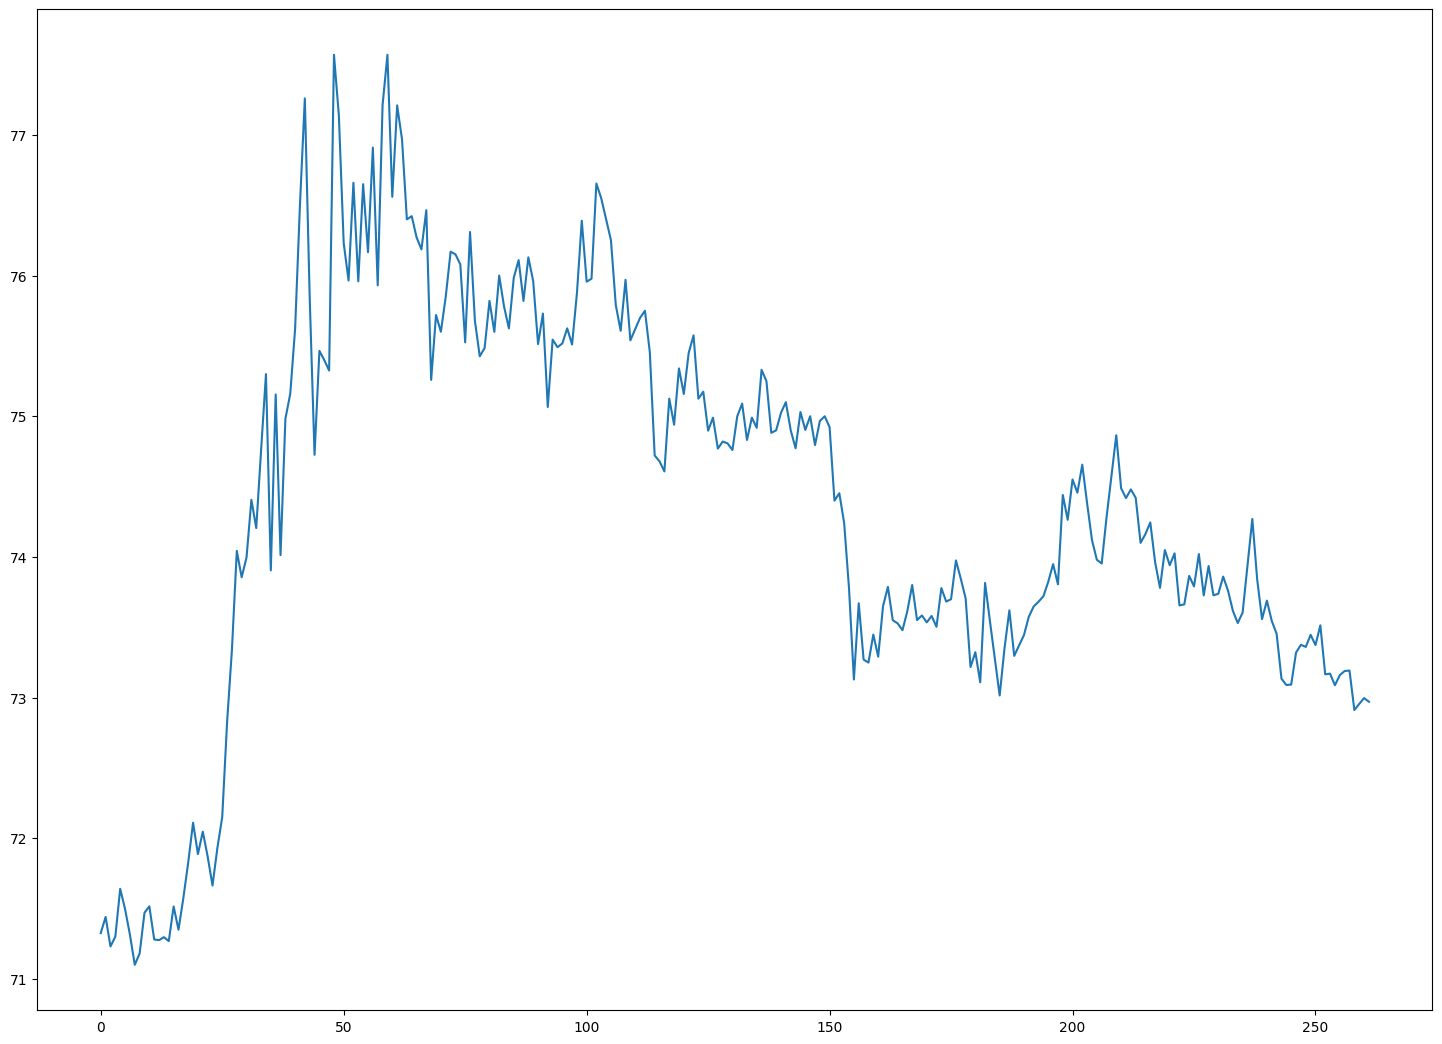

In [60]:
plt.figure(figsize=(18,13))
plt.plot(data['Close'])
plt.show()

In [61]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0
261,2021-01-26,72.970001,73.222000,72.774498,72.970001,72.970001,0


In [62]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [63]:
data[data['Close'] == data['Adj Close']].shape

(262, 7)

In [64]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

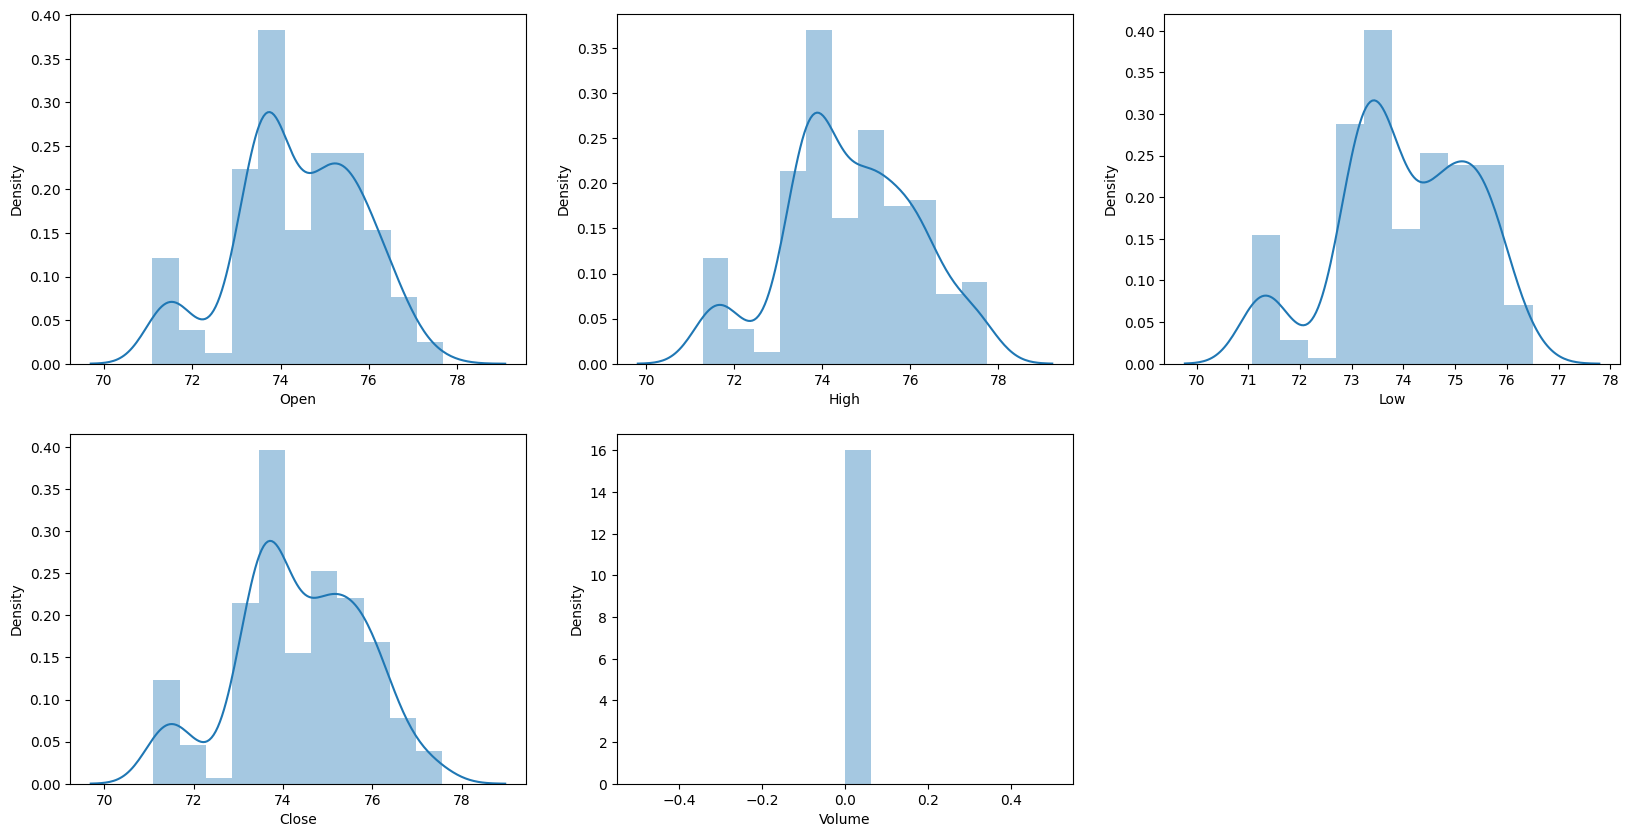

In [65]:
feature = ['Open','High','Low','Close','Volume']
plt.subplots(figsize = (20,10))
for i,col in enumerate(feature):
    plt.subplot(2,3,i+1)
    sb.distplot(data[col])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

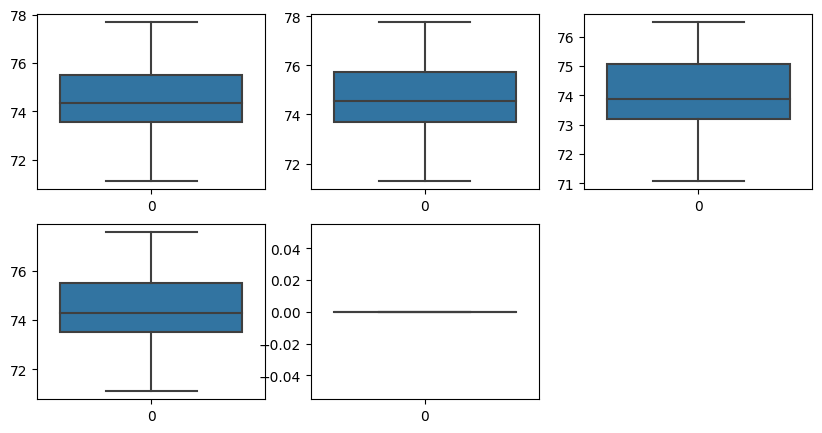

In [66]:
plt.subplots(figsize=(10,5))
for i,col in enumerate(feature):
    plt.subplot(2,3,i+1)
    sb.boxplot(data[col])
plt.show

In [67]:
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0,27,1,2020
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0,28,1,2020
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0,29,1,2020
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0,30,1,2020
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0,31,1,2020


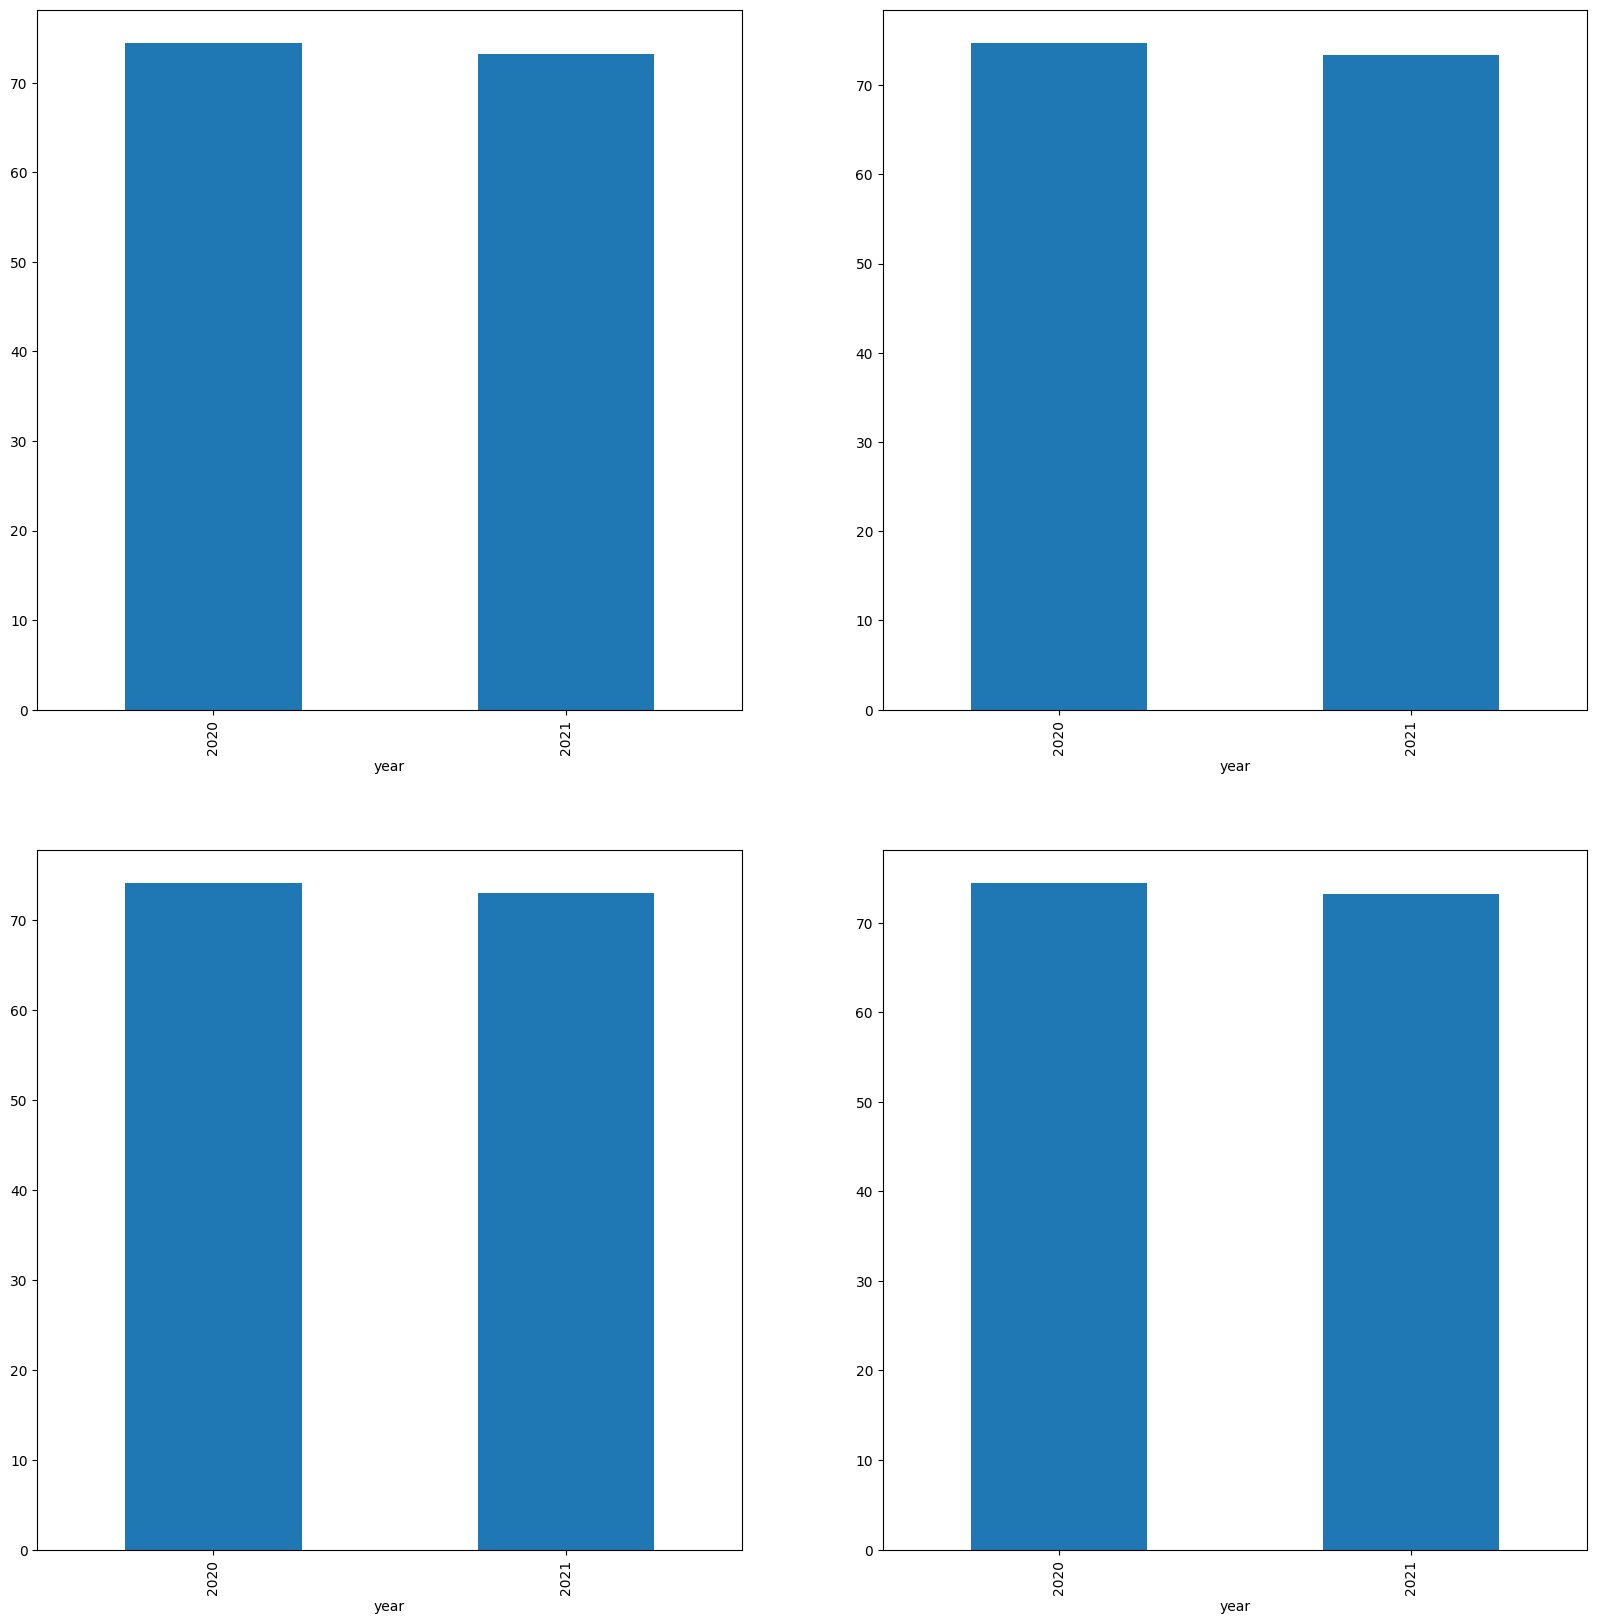

In [68]:
data_grouped = data.groupby('year').mean()
plt.subplots(figsize=(20,20))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [69]:
data['open-close']= data['Open'] - data['Close']
data['low-high']= data['Low'] - data['High']
data['target']= np.where(data['Close'].shift(-1) > data['Close'],1,0)

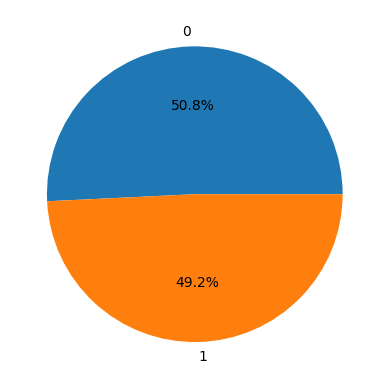

In [70]:
plt.pie(data['target'].value_counts().values,labels=[0,1], autopct='%1.1f%%')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

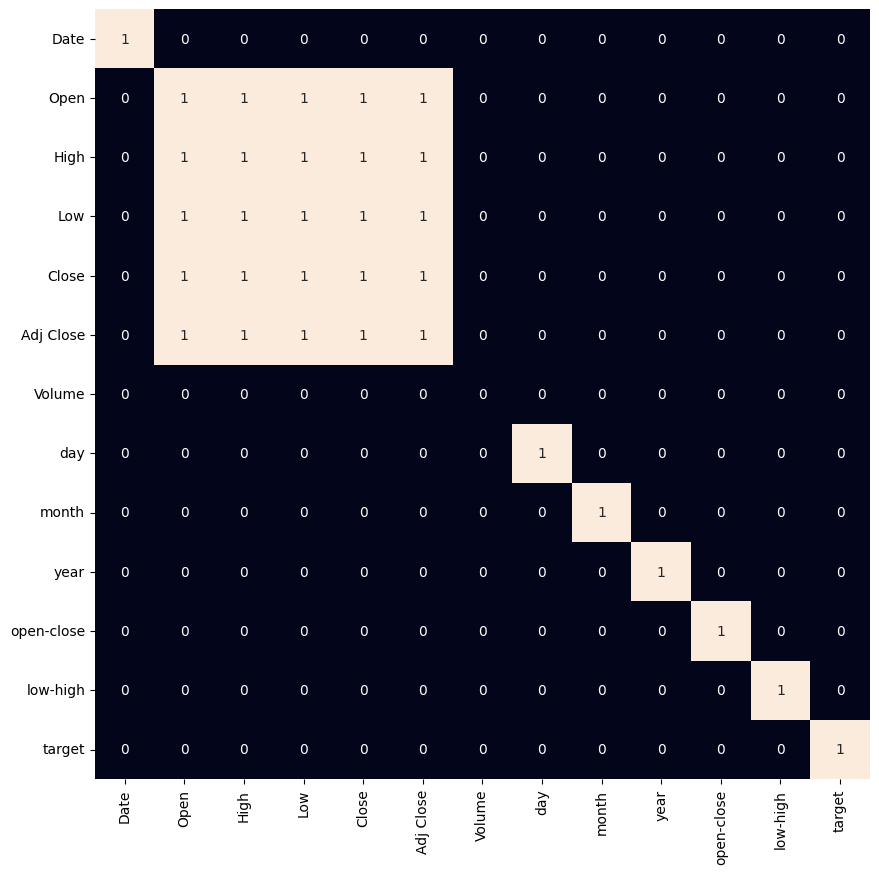

In [71]:
plt.figure(figsize=(10,10))
sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show

In [72]:
feature= data[['open-close', 'low-high']]
target=data['target']

scaler= StandardScaler()
features=scaler.fit_transform(feature)

x_train, x_valid, Y_train, Y_valid = train_test_split(feature, target, test_size=0.111, random_state=75)
print(x_train.shape, x_valid.shape)

(232, 2) (30, 2)


In [73]:
model = DecisionTreeClassifier()
model.fit(x_train, Y_train)
y_pred= model.predict(x_valid)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1])

In [74]:
dt= pd.DataFrame(y_pred)
dt.index +=1
dt

,0
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,0
9,0
10,0


In [75]:
dt.value_counts()

1    17
0    13
Name: count, dtype: int64

In [76]:
print(accuracy_score(Y_valid,y_pred)*100)

70.0


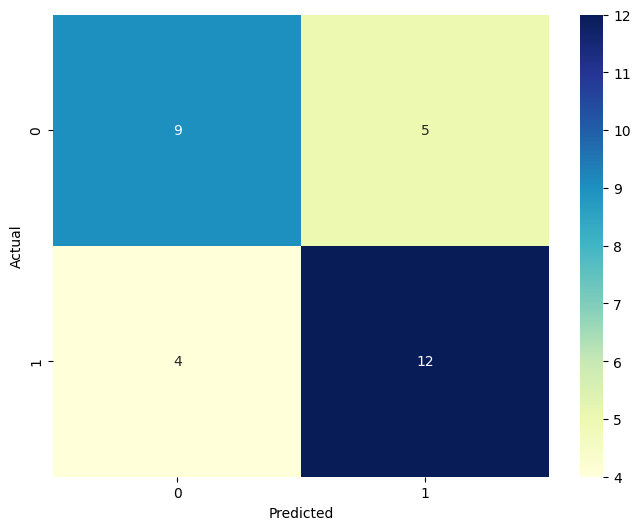

In [77]:
confusion = confusion_matrix(Y_valid, y_pred)
plt.figure(figsize=(8, 6))
sb.heatmap(confusion, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [78]:
model= RandomForestClassifier()
model.fit(x_train, Y_train)
y_pred= model.predict(x_valid)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1])

In [79]:
print(accuracy_score(Y_valid,y_pred)*100)

73.33333333333333
